In [1]:
import llm_core.llm as L
from diffusers import AutoPipelineForText2Image
import torch

In [2]:
#make prompt
# Write a short, catchy sentence that connects {keyword}

In [2]:
pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "stabilityai/sdxl-turbo",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [3]:
l = L.LLM(verbose=True)
target_language = 'German'
target_word = 'flache'
# might need a translation library
en_word = 'bottle'

llama_model_loader: additional 2 GGUFs metadata loaded.
llama_model_loader: loaded meta data with 29 key-value pairs and 339 tensors from /data/ai_club/llms/qwen2.5-7b-instruct-q8_0-00001-of-00003.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = qwen2
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = qwen2.5-7b-instruct
llama_model_loader: - kv   3:                            general.version str              = v0.1
llama_model_loader: - kv   4:                           general.finetune str              = qwen2.5-7b-instruct
llama_model_loader: - kv   5:                         general.size_label str              = 7.6B
llama_model_loader: - kv   6:                          qwen

llama_model_loader: - kv  19:                      tokenizer.ggml.merges arr[str,151387]  = ["Ġ Ġ", "ĠĠ ĠĠ", "i n", "Ġ t",...
llama_model_loader: - kv  20:                tokenizer.ggml.eos_token_id u32              = 151645
llama_model_loader: - kv  21:            tokenizer.ggml.padding_token_id u32              = 151643
llama_model_loader: - kv  22:                tokenizer.ggml.bos_token_id u32              = 151643
llama_model_loader: - kv  23:               tokenizer.ggml.add_bos_token bool             = false
llama_model_loader: - kv  24:                    tokenizer.chat_template str              = {%- if tools %}\n    {{- '<|im_start|>...
llama_model_loader: - kv  25:               general.quantization_version u32              = 2
llama_model_loader: - kv  26:                                   split.no u16              = 0
llama_model_loader: - kv  27:                                split.count u16              = 3
llama_model_loader: - kv  28:                        split.tens

Initializing Global LLM Instance


llm_load_vocab: special tokens cache size = 22
llm_load_vocab: token to piece cache size = 0.9310 MB
llm_load_print_meta: format           = GGUF V3 (latest)
llm_load_print_meta: arch             = qwen2
llm_load_print_meta: vocab type       = BPE
llm_load_print_meta: n_vocab          = 152064
llm_load_print_meta: n_merges         = 151387
llm_load_print_meta: vocab_only       = 0
llm_load_print_meta: n_ctx_train      = 131072
llm_load_print_meta: n_embd           = 3584
llm_load_print_meta: n_layer          = 28
llm_load_print_meta: n_head           = 28
llm_load_print_meta: n_head_kv        = 4
llm_load_print_meta: n_rot            = 128
llm_load_print_meta: n_swa            = 0
llm_load_print_meta: n_embd_head_k    = 128
llm_load_print_meta: n_embd_head_v    = 128
llm_load_print_meta: n_gqa            = 7
llm_load_print_meta: n_embd_k_gqa     = 512
llm_load_print_meta: n_embd_v_gqa     = 512
llm_load_print_meta: f_norm_eps       = 0.0e+00
llm_load_print_meta: f_norm_rms_eps   = 1.0e

ValueError: Failed to create llama_context

In [ ]:
llm_prompt = f"Describe the {target_language} word '{target_word}' for {en_word} using an English word that sounds the same in a short catchy sentence."
image_prompt = l(llm_prompt)
image_prompt

Describe the German word 'flache' for bottle using an English word that sounds the same in a short catchy sentence.


'Flat bottle.'

In [ ]:
image = pipe(prompt=image_prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
image.save('image.png')

  0%|          | 0/1 [00:00<?, ?it/s]

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


Unable to connect to VS Code server: Error in request.
Error: connect ENOENT /run/user/53400554/vscode-ipc-f70d2956-491d-468c-ae51-e600bd6d0393.sock
    at PipeConnectWrap.afterConnect [as oncomplete] (node:net:1611:16) {
  errno: -2,
  code: 'ENOENT',
  syscall: 'connect',
  address: '/run/user/53400554/vscode-ipc-f70d2956-491d-468c-ae51-e600bd6d0393.sock'
}
Unable to connect to VS Code server: Error in request.
Error: connect ENOENT /run/user/53400554/vscode-ipc-f70d2956-491d-468c-ae51-e600bd6d0393.sock
    at PipeConnectWrap.afterConnect [as oncomplete] (node:net:1611:16) {
  errno: -2,
  code: 'ENOENT',
  syscall: 'connect',
  address: '/run/user/53400554/vscode-ipc-f70d2956-491d-468c-ae51-e600bd6d0393.sock'
}
xdg-open: no method available for opening '/tmp/tmpe6_0p2d5.PNG'


Unable to connect to VS Code server: Error in request.
Error: connect ENOENT /run/user/53400554/vscode-ipc-f70d2956-491d-468c-ae51-e600bd6d0393.sock
    at PipeConnectWrap.afterConnect [as oncomplete] (node:net:1611:16) {
  errno: -2,
  code: 'ENOENT',
  syscall: 'connect',
  address: '/run/user/53400554/vscode-ipc-f70d2956-491d-468c-ae51-e600bd6d0393.sock'
}
xdg-open: no method available for opening '/tmp/tmptfwn4vmz.PNG'


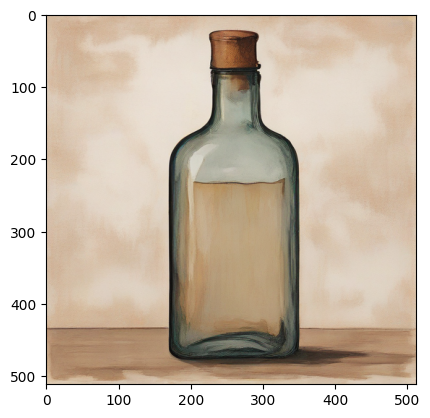

In [7]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [5]:
def initialize(llm_prompt=''):
    l = L.LLM(llm_prompt)
    pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
    pipe.to("cuda")
    return (l, pipe)

In [ ]:
def gen_image(target_word, target_language, en_word, l, pipe):
    llm_prompt = f"Describe the {target_language} word '{target_word}' for {en_word} using an English word that sounds the same in a short catchy sentence."
    image_prompt = l(llm_prompt)
    image = pipe(prompt=image_prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
    image.save('image.png')
    return (image, image_prompt)

In [8]:
l, pipe = initialize()
image, image_prompt = gen_image('talo', 'Finnish', 'house', l, pipe)
print(image_prompt)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 14.00 MiB. GPU 3 has a total capacity of 14.57 GiB of which 10.75 MiB is free. Process 2494867 has 2.39 GiB memory in use. Including non-PyTorch memory, this process has 12.16 GiB memory in use. Of the allocated memory 9.20 GiB is allocated by PyTorch, and 265.11 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)